In this file we explore the dataset without any alteration

# Imports and Configurations

In [27]:
import torch
import torchvision
import torchvision.transforms as transforms

import torchinfo

import matplotlib.pyplot as plt
import numpy as np
import time

import os
import pathlib
from PIL import Image
import skimage
from tqdm import tqdm

# importing a module with utilities for displaying stats and data
import sys
sys.path.insert(1, 'util')
import vcpi_util

In [28]:
# Paths
pathTrain = 'train_images/GTSRB/Final_Training/Images'
pathTest = 'test_images'

# Batch size
BATCH_SIZE = 32
IMAGE_SIZE = 32

# Prepare and Load Data

In [29]:
# Convert the images from ppm to png
from PIL import Image
import glob
def ppm2png():
    images = glob.glob(f'{pathTrain}/**/*.ppm',recursive=True)
    for image in images:
        im = Image.open(image)
        new_filename = image[:-4] + '.png'
        im.save(new_filename)
        #if image.endswith('.ppm'):
        #    os.remove(image)

    images = glob.glob(f'{pathTest}/**/*.ppm',recursive=True)
    for image in images:
        im = Image.open(image)
        new_filename = image[:-4] + '.png'
        im.save(new_filename)

#ppm2png()

In [30]:
transform = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),transforms.ToTensor()])

In [31]:
train_set = torchvision.datasets.ImageFolder(root=pathTrain, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

test_set = torchvision.datasets.ImageFolder(root=pathTest, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE)

In [32]:
train_set.classes

['00000', '00001']

In [33]:
test_set.classes

['00000', '00001', '00002', '00003']

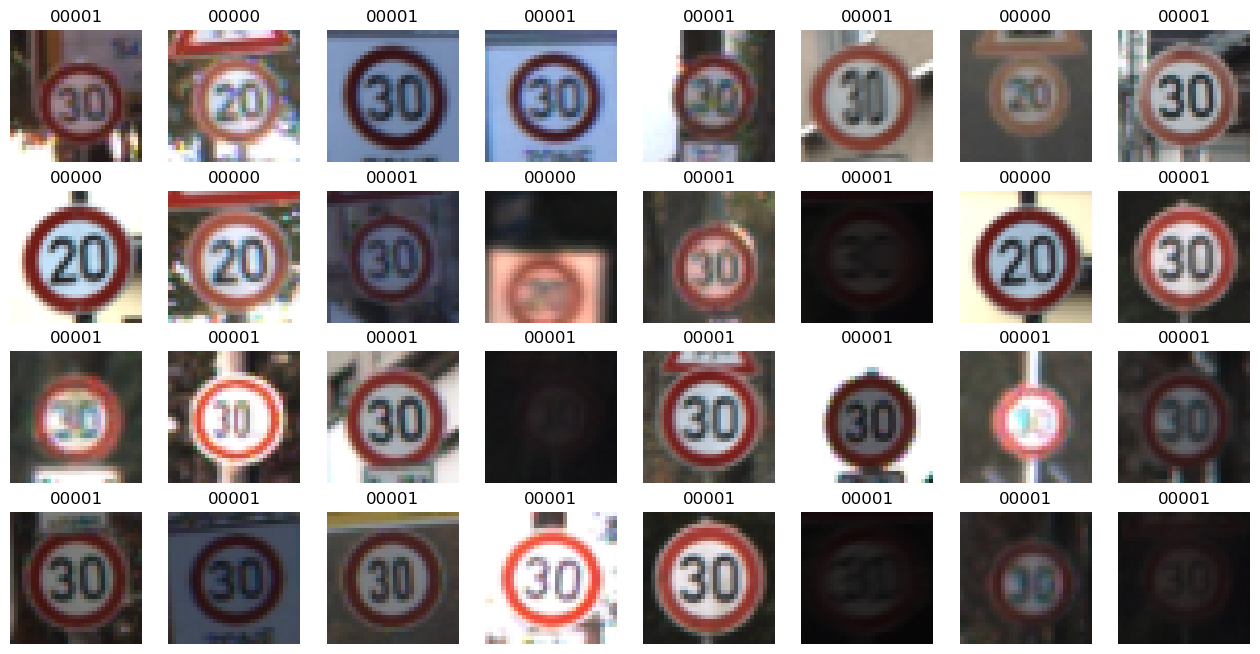

<Figure size 640x480 with 0 Axes>

In [35]:
images, targets = next(iter(train_loader))
vcpi_util.show_images(4,8,images, targets, train_set.classes)

# Treino